# 第9章 一元线性回归

## 初始化

In [14]:
# 本章需要用到的库
import numpy as np # 导入numpy库
import pandas as pd # 导入pandas库
import matplotlib.pyplot as plt # 导入matplotlib库
import seaborn as sns # 导入seaborn库
from scipy.stats import pearsonr # 导入Pearson相关系数函数
from scipy.stats import f # 导入F分布函数
import statsmodels.api as sm # 导入statsmodels库
from statsmodels.formula.api import ols # 导入普通最小二乘法函数
from statsmodels.stats.anova import anova_lm # 导入方差分析函数
from statsmodels.stats.outliers_influence import summary_table # 导入影响汇总表函数
from statsmodels.stats.stattools import durbin_watson # 导入DW检验函数

# 设置初始化
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

## 9.1 确定变量间的关系

### 9.1.1 变量间的关系

### 9.1.2 相关关系的描述

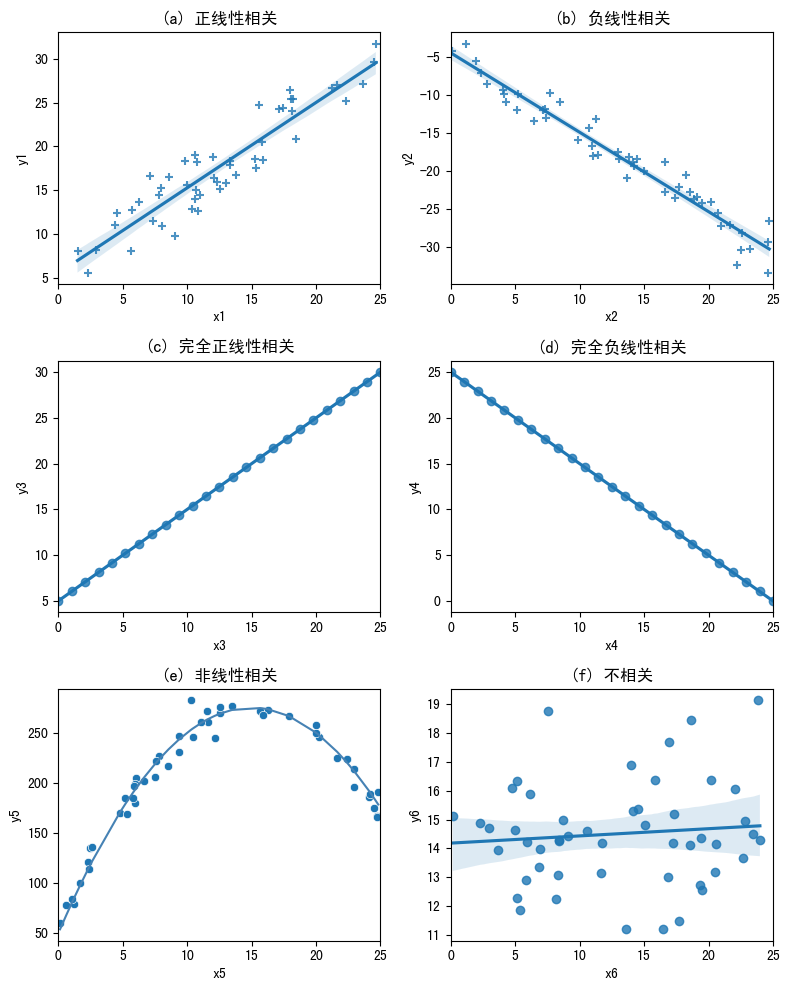

In [44]:
np.random.seed(123) # 设置随机种子
plt.subplots(3, 2, figsize=(8, 10)) # 设置画布大小(12, 12

plt.subplot(321) # 绘制第一个子图
x1 = np.random.uniform(0, 25, size=50) # 生成自变量x1
y1 = x1 + 5 + np.random.normal(0, 2, size=50) # 生成因变量y1
sns.regplot(x=x1, y=y1, marker='+') # 绘制散点图和回归线
plt.xlim(0, 25) # 设置x轴的范围
plt.xlabel('x1') # 设置x轴标签
plt.ylabel('y1') # 设置y轴标签
plt.title('(a) 正线性相关') # 设置子图标题

plt.subplot(322) # 绘制第二个子图
x2 = np.random.uniform(0, 25, size=50) # 生成自变量x2
y2 = - x2 - 5 + np.random.normal(0, 2, size=50) # 生成因变量y2
sns.regplot(x=x2, y=y2, marker='+') # 绘制散点图和回归线
plt.xlim(0, 25) # 设置x轴的范围
plt.xlabel('x2') # 设置x轴标签
plt.ylabel('y2') # 设置y轴标签
plt.title('(b) 负线性相关') # 设置子图标题

plt.subplot(323) # 绘制第三个子图
x3 = np.linspace(0, 25, 25) # 生成自变量x3
y3 = x3 + 5 # 生成因变量y3
sns.regplot(x=x3, y=y3, marker='o') # 绘制散点图和回归线
plt.xlim(0, 25) # 设置x轴的范围
plt.xlabel('x3') # 设置x轴标签
plt.ylabel('y3') # 设置y轴标签
plt.title('(c) 完全正线性相关') # 设置子图标题

plt.subplot(324) # 绘制第四个子图
x4 = np.linspace(0, 25, 25) # 生成自变量x4
y4 = - x4 + 25 # 生成因变量y4
sns.regplot(x=x4, y=y4, marker='o') # 绘制散点图和回归线
plt.xlim(0, 25) # 设置x轴的范围
plt.xlabel('x4') # 设置x轴标签
plt.ylabel('y4') # 设置y轴标签
plt.title('(d) 完全负线性相关') # 设置子图标题

plt.subplot(325) # 绘制第五个子图
x5 = np.random.uniform(0, 25, size=50) # 生成自变量x5
y5 = -x5**2 + 30*x5 + 50 + np.random.normal(0, 10, size=50) # 生成因变量y5
sns.scatterplot(x=x5, y=y5, marker='o') # 绘制散点图
sns.lineplot(x=x5, y=-x5**2 + 30*x5 + 50, color='steelblue') # 绘制方程图像
plt.xlim(0, 25) # 设置x轴的范围
plt.xlabel('x5') # 设置x轴标签
plt.ylabel('y5') # 设置y轴标签
plt.title('(e) 非线性相关') # 设置子图标题

plt.subplot(326) # 绘制第六个子图
x6 = np.random.uniform(0, 25, size=50) # 生成自变量x6
y6 = np.random.normal(15, 2, size=50) # 生成因变量y6
sns.regplot(x=x6, y=y6, marker='o') # 绘制散点图和回归线
plt.xlim(0, 25) # 设置x轴的范围
plt.xlabel('x6') # 设置x轴标签
plt.ylabel('y6') # 设置y轴标签
plt.title('(f) 不相关') # 设置子图标题

plt.tight_layout() # 设置子图的间距
plt.show() # 展示图像

In [2]:
example9_1 = pd.read_csv('./pydata/chap09/example9_1.csv', encoding='gbk') # 读取数据
example9_1.head() # 显示前5行数据

,企业编号,销售收入,广告支出
0,1,4597.5,338.6
1,2,6611.0,811.0
2,3,7349.3,723.5
3,4,5525.7,514.0
4,5,4675.9,426.4


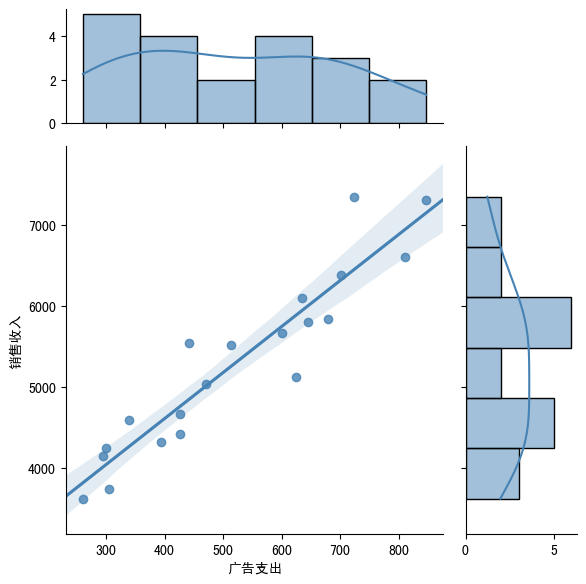

In [45]:
# 绘制销售收入与广告支出的散点图
sns.jointplot(
    x='广告支出', y='销售收入', data=example9_1, 
    kind='reg', truncate=False, color='steelblue',
    height=6, ratio=3, marginal_ticks=True
) # 绘制散点图和回归线
plt.show() # 展示图像

### 9.1.3 关系强度的度量

提出假设：
- $H_0: \rho = 0$(两个变量的线性关系不显著)
- $H_1: \rho \ne 0$(两个变量的线性关系显著)

In [47]:
corr, p_value = pearsonr(example9_1['广告支出'], example9_1['销售收入']) # 计算相关系数和p值
print(f'二者的相关系数为{corr:.4f}, 检验的p值为{p_value:.4g}')

二者的相关系数为0.9371, 检验的p值为1.161e-09


由于P<0.05, 所以拒绝原假设。

## 9.2 模型的估计和检验

### 9.2.1 回归模型与回归方程

### 9.2.2 参数的最小二乘估计

估计方程：$\hat{y} = b_0 + b_1 \times 广告支出$

In [3]:
model = ols('销售收入 ~ 广告支出', data=example9_1).fit() # 拟合普通最小二乘回归模型
model.summary() # 显示回归结果

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   销售收入   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     129.8
Date:                Tue, 16 May 2023   Prob (F-statistic):           1.16e-09
Time:                        20:43:20   Log-Likelihood:                -146.85
No. Observations:                  20   AIC:                             297.7
Df Residuals:                      18   BIC:                             299.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2343.8916    274.483      8.539      0.000    1767.225    2920.558
广告支出           5.6735      0.498     11.391      0.000       4.627       6.720
==============================================================================
Omnibus:                        2.082   Durbin-Watson:                   1.679
Prob(Omnibus):                  0.353   Jarque-Bera (JB):                0.854
Skew:                           0.473   Prob(JB):                        0.652
Kurtosis:                       3.360   Cond. No.                     1.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [4]:
anova_table = anova_lm(model, typ=1) # 显示方差分析表
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
广告支出,1.0,2.013930e+07,2.013930e+07,129.762217,1.161175e-09
Residual,18.0,2.793629e+06,1.552016e+05,NaN,NaN


拟合结果：$\hat{y} = 2343.8916 + 5.6735 \times 广告支出$

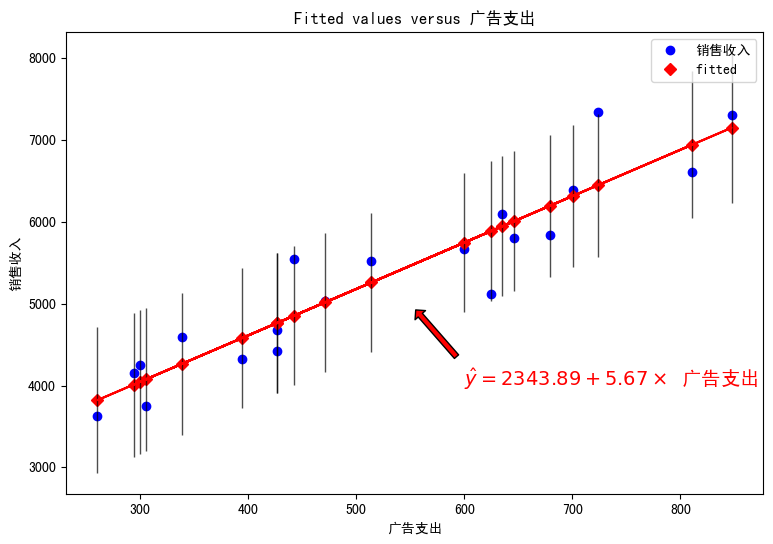

In [52]:
# 绘制拟合图
fig, ax = plt.subplots(figsize=(9, 6)) # 设置画布大小
sm.graphics.plot_fit(model, exog_idx='广告支出', ax=ax) # 绘制拟合图
plt.plot(example9_1['广告支出'], model.fittedvalues, 'r') # 绘制拟合线
plt.annotate(
    text=f'$\hat y={model.params[0]:.2f}+{model.params[1]:.2f} \\times$ 广告支出', # 设置注释文本
    xy=(550, 5000), xytext=(600, 4000), 
    arrowprops={'headwidth': 10, 'headlength': 5, 'width': 4, 'facecolor': 'r', 'shrink': 0.1}, 
    fontsize=14, color='red', ha='left'
) # 绘制注释
plt.show() # 展示图像

### 9.2.3 模型的拟合优度

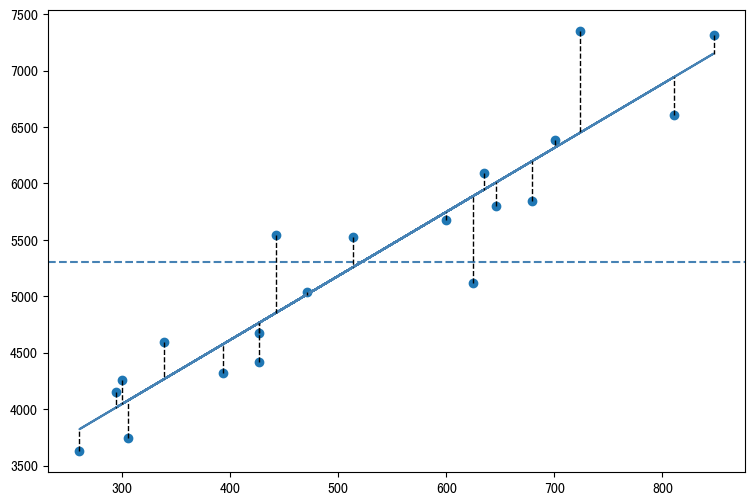

In [65]:
# 误差分解示意图
plt.figure(figsize=(9, 6)) # 设置画布大小
plt.plot(example9_1['广告支出'], example9_1['销售收入'], 'o') # 绘制散点图
plt.plot(example9_1['广告支出'], model.fittedvalues, 'steelblue') # 绘制拟合线
plt.axhline(y=example9_1['销售收入'].mean(), color='steelblue', linestyle='--') # 绘制均值线
for i in range(example9_1.shape[0]): # 遍历每个观测点
    plt.plot(
        [example9_1['广告支出'][i], example9_1['广告支出'][i]],
        [example9_1['销售收入'][i], model.fittedvalues[i]],
        'k--', linewidth=1
    ) # 绘制误差线
plt.show() # 展示图像

$S_e = \sqrt{\frac{\sum (y_i - \hat{y}_i)^2}{n-k-1}} = \sqrt{\frac{SSE}{n-k-1}} = \sqrt{MSE}$

In [71]:
# 计算残差标准误-根据方差分析表
rse = np.sqrt(anova_table.loc['Residual', 'mean_sq'])
print(f'残差标准误为{rse:.2f}')

残差标准误为393.96


In [87]:
# 计算残差标准误-根据回归模型
print(f'残差标准误为{model.mse_resid**0.5:.2f}')

残差标准误为393.96


### 9.2.4 模型的显著性检验

$F = \frac{SSR/k}{SSE/(n-k-1)} = \frac{MSR}{MSE} \sim F(k, n-k-1)$

In [81]:
# F检验-根据方差分析表
F = anova_table.loc['广告支出', 'mean_sq'] / anova_table.loc['Residual', 'mean_sq']
p_value = 1 - f.cdf(F, dfn=anova_table.loc['广告支出', 'df'], dfd=anova_table.loc['Residual', 'df'])
print(f'F值为{F:.2f}, p值为{p_value:.4g}')

F值为129.76, p值为1.161e-09


In [80]:
# F检验-根据回归模型
print(f'F值为{model.fvalue:.2f}, p值为{model.f_pvalue:.4g}')

F值为129.76, p值为1.161e-09


In [91]:
# t检验
print(r'广告支出回归系数的t检验')
print(f't值为{model.tvalues[1]:.2f}, p值为{model.pvalues[1]:.4g}')

广告支出回归系数的t检验
t值为11.39, p值为1.161e-09


## 9.3 利用回归方程进行预测

### 9.3.1 均值的置信区间

$\hat {y}_0 \pm t_{\alpha/2} s_{\hat{y}_0} = \hat {y}_0 \pm t_{\alpha/2} s_e \sqrt{\frac{1}{n} + \frac{(x_0 - \bar{x})^2}{\sum (x_i - \bar{x})^2}}$

### 9.3.2 个别值的预测区间

$\hat {y}_0 \pm t_{\alpha/2} s_{ind} = \hat {y}_0 \pm t_{\alpha/2} s_e \sqrt{1 + \frac{1}{n} + \frac{(x_0 - \bar{x})^2}{\sum (x_i - \bar{x})^2}}$

In [93]:
conf_level = 0.95 # 设置置信水平
st, _, _ = summary_table(model, alpha=1-conf_level) # 计算置信区间
columns = [x + ' ' + y for x, y in zip(st.data[0], st.data[1])] # 设置列名
df_res = pd.DataFrame() # 创建空的数据框
for i in range(len(st.data) - 2):
    df_res = pd.concat([df_res, pd.DataFrame(st.data[i+2], index=columns).T], ignore_index=True) # 将置信区间添加到数据框中
df_res.reset_index(drop=True, inplace=True) # 重置索引
round(df_res, 2) # 显示结果

,Obs,Dep Var Population,Predicted Value,Std Error Mean Predict,Mean ci 95% low,Mean ci 95% upp,Predict ci 95% low,Predict ci 95% upp,Residual,Std Error Residual,Student Residual,Cook's D
0,1.0,4597.5,4264.92,126.89,3998.35,4531.50,3395.38,5134.47,332.58,372.96,0.89,0.05
1,2.0,6611.0,6945.07,168.77,6590.49,7299.64,6044.64,7845.49,-334.07,355.97,-0.94,0.10
2,3.0,7349.3,6448.64,133.55,6168.06,6729.22,5574.70,7322.58,900.66,370.63,2.43,0.38
3,4.0,5525.7,5260.05,88.18,5074.79,5445.31,4411.90,6108.20,265.65,383.96,0.69,0.01
4,5.0,4675.9,4763.05,100.13,4552.70,4973.41,3909.07,5617.04,-87.15,381.02,-0.23,0.00
5,6.0,4418.6,4762.49,100.15,4552.08,4972.89,3908.49,5616.48,-343.89,381.01,-0.90,0.03
6,7.0,5845.4,6196.17,117.80,5948.68,6443.66,5332.29,7060.05,-350.77,375.93,-0.93,0.04
7,8.0,7313.0,7151.01,184.43,6763.53,7538.49,6237.13,8064.90,161.99,348.12,0.47,0.03
8,9.0,5035.4,5015.52,91.69,4822.89,5208.15,4165.73,5865.32,19.88,383.14,0.05,0.00
9,10.0,4322.6,4578.10,108.79,4349.55,4806.65,3719.45,5436.75,-255.50,378.64,-0.67,0.02


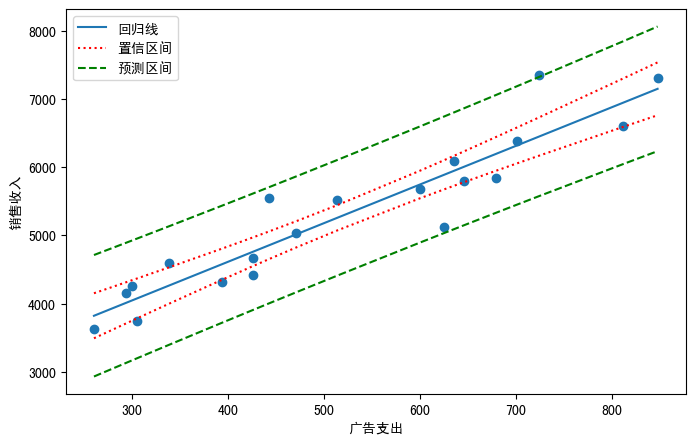

In [98]:
df_res['广告支出'] = example9_1['广告支出'] # 添加广告支出变量
df_plot = df_res.sort_values(by='广告支出') # 按照广告支出变量排序
df_plot.reset_index(drop=True, inplace=True) # 重置索引

plt.figure(figsize=(8, 5)) # 设置画布大小
plt.scatter(df_plot['广告支出'], df_plot['Dep Var Population']) # 绘制散点图
p1, = plt.plot(df_plot['广告支出'], df_plot['Predicted Value']) # 绘制回归拟合线
p2, = plt.plot(df_plot['广告支出'], df_plot['Mean ci 95% low'], 'r:') # 绘制置信区间下限
p3, = plt.plot(df_plot['广告支出'], df_plot['Mean ci 95% upp'], 'r:') # 绘制置信区间上限
p4, = plt.plot(df_plot['广告支出'], df_plot['Predict ci 95% low'], 'g--') # 绘制预测区间下限
p5, = plt.plot(df_plot['广告支出'], df_plot['Predict ci 95% upp'], 'g--') # 绘制预测区间上限
plt.xlabel('广告支出') # 设置x轴标签
plt.ylabel('销售收入') # 设置y轴标签
plt.legend([p1, p2, p4], ['回归线', '置信区间', '预测区间']) # 设置图例
plt.show() # 展示图像

## 9.4 回归模型的诊断

### 9.4.1 残差与残差图

残差：$e_i = y_i - \hat{y}_i$

标准化残差：$z_{e_i} = \frac{e_i}{s_e} = \frac{y_i - \hat{y}_i}{s_e}$

In [99]:
df = pd.DataFrame({
    '企业编号': example9_1['企业编号'],
    '销售收入': example9_1['销售收入'],
    '点预测值': model.fittedvalues,
    '残差': model.resid,
    '标准化残差': model.resid_pearson
}) # 创建数据框
round(df, 4) # 显示数据框

,企业编号,销售收入,点预测值,残差,标准化残差
0,1,4597.5,4264.9246,332.5754,0.8442
1,2,6611.0,6945.0665,-334.0665,-0.8480
2,3,7349.3,6448.6388,900.6612,2.2862
3,4,5525.7,5260.0493,265.6507,0.6743
4,5,4675.9,4763.0543,-87.1543,-0.2212
5,6,4418.6,4762.4870,-343.8870,-0.8729
6,7,5845.4,6196.1699,-350.7699,-0.8904
7,8,7313.0,7151.0130,161.9870,0.4112
8,9,5035.4,5015.5232,19.8768,0.0505
9,10,4322.6,4578.0996,-255.4996,-0.6485


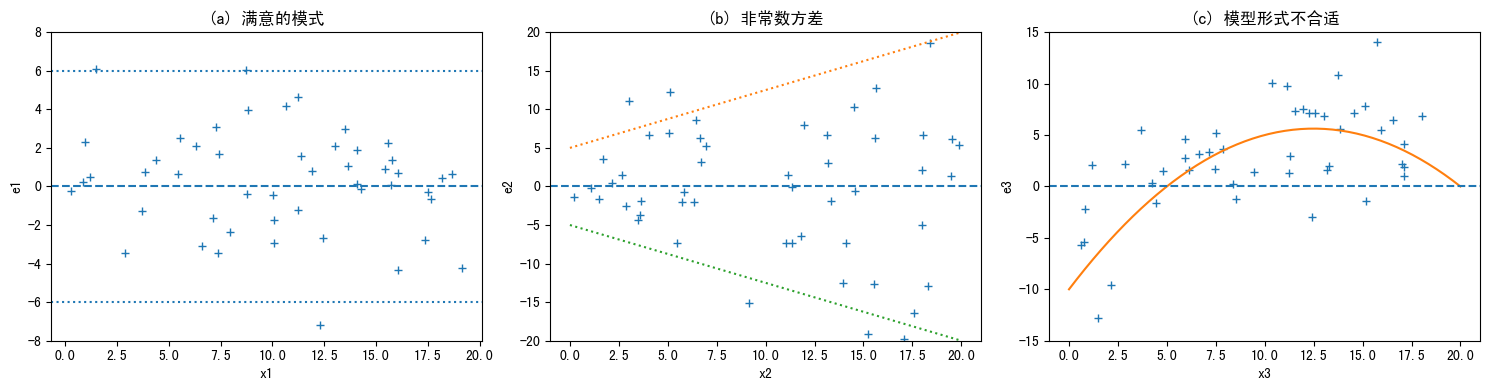

In [12]:
# 绘制不同形态的残差图
np.random.seed(1234) # 设置随机种子
plt.subplots(1, 3, figsize=(15, 4)) # 设置画布大小

plt.subplot(131) # 创建第一个子图
x1 = np.random.uniform(0, 20, 50) # 创建自变量
e1 = np.random.normal(0, 3, 50) # 创建误差项
plt.plot(x1, e1, '+') # 绘制散点图
plt.axhline(0, linestyle='--') # 绘制e=0的直线
plt.axhline(-6, linestyle=':') # 绘制e=-6的直线
plt.axhline(6, linestyle=':') # 绘制e=6的直线
plt.xlabel('x1') # 设置x轴标签
plt.ylabel('e1') # 设置y轴标签
plt.ylim(-8, 8)
plt.title('(a) 满意的模式')

plt.subplot(132) # 创建第二个子图
x2 = np.random.uniform(0, 20, 50) # 创建自变量
e2 = np.random.normal(0, 3, 50) # 创建误差项
e2 = x2 ** 0.4 * e2 # 修改误差项, 使其与自变量相关
plt.plot(x2, e2, '+') # 绘制散点图
plt.axhline(0, linestyle='--') # 绘制e=0的直线
plt.plot([0, 20], [5, 20], ':') # 绘制上限
plt.plot([0, 20], [-5, -20], ':') # 绘制下限
plt.xlabel('x2') # 设置x轴标签
plt.ylabel('e2') # 设置y轴标签
plt.ylim(-20, 20)
plt.title('(b) 非常数方差')

plt.subplot(133) # 创建第三个子图
x3 = np.random.uniform(0, 20, 50) # 创建自变量
y = lambda x: - 0.1 * x ** 2 + 2.5 * x - 10 # 创建函数
e3 = y(x3) + np.random.normal(0, 5, 50) # 创建误差项
plt.plot(x3, e3, '+') # 绘制散点图
plt.plot(np.linspace(0, 20, 50), y(np.linspace(0, 20, 50)), '-') # 绘制函数图像
plt.axhline(0, linestyle='--') # 绘制e=0的直线
plt.xlabel('x3') # 设置x轴标签
plt.ylabel('e3') # 设置y轴标签
plt.ylim(-15, 15)
plt.title('(c) 模型形式不合适')

plt.tight_layout() # 设置子图的间距
plt.show() # 展示图像

### 9.4.2 检验模型假定

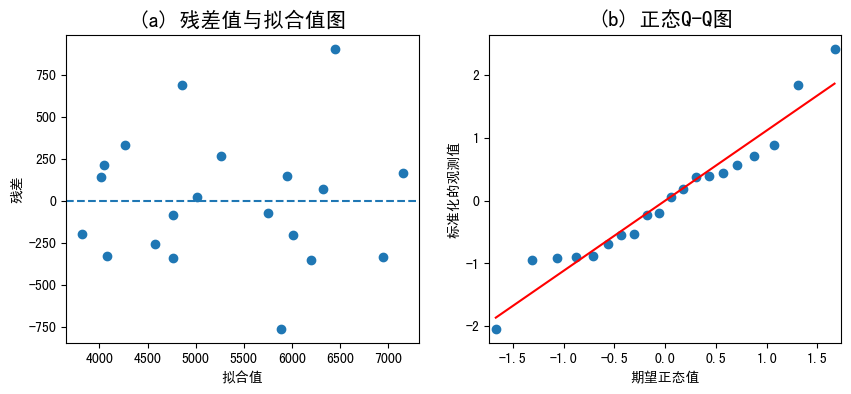

In [13]:
# 残差的正态性与方差齐性
plt.subplots(1, 2, figsize=(10, 4)) # 设置画布大小

plt.subplot(121) # 创建第一个子图
plt.scatter(model.fittedvalues, model.resid) # 绘制散点图
plt.axhline(0, linestyle='--') # 绘制e=0的直线
plt.xlabel('拟合值') # 设置x轴标签
plt.ylabel('残差') # 设置y轴标签
plt.title('(a) 残差值与拟合值图', fontsize=15) # 设置子图标题

ax2 = plt.subplot(122) # 创建第二个子图
pplot = sm.ProbPlot(model.resid, fit=True) # 创建概率图对象
pplot.qqplot(line='r', ax=ax2, xlabel='期望正态值', ylabel='标准化的观测值') # 绘制Q-Q图
ax2.set_title('(b) 正态Q-Q图', fontsize=15) # 设置子图标题

plt.show()

In [15]:
# 残差是否独立（无自相关性）
# Durbin-Watson检验
dw = durbin_watson(model.resid) # 计算DW检验的值
print(f'Durbin-Watson检验的值为{dw:.2f}')

Durbin-Watson检验的值为1.68


## 习题

### 9.1

In [16]:
df = pd.read_csv('./exercise/chap09/exercise9_1.csv', encoding='gbk') # 读取数据
df

,x1,x2,x3,x4,y1,y2,y3,y4
0,10,10,10,8,8.04,9.14,7.46,6.58
1,8,8,8,8,6.95,8.14,6.77,5.76
2,13,13,13,8,7.58,8.74,12.74,7.71
3,9,9,9,8,8.81,8.77,7.11,8.84
4,11,11,11,8,8.33,9.26,7.81,8.47
5,14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,6,8,7.24,6.13,6.08,5.25
7,4,4,4,19,4.26,3.10,5.39,12.50
8,12,12,12,8,10.84,9.13,8.15,5.56
9,7,7,7,8,4.82,7.26,6.42,7.91


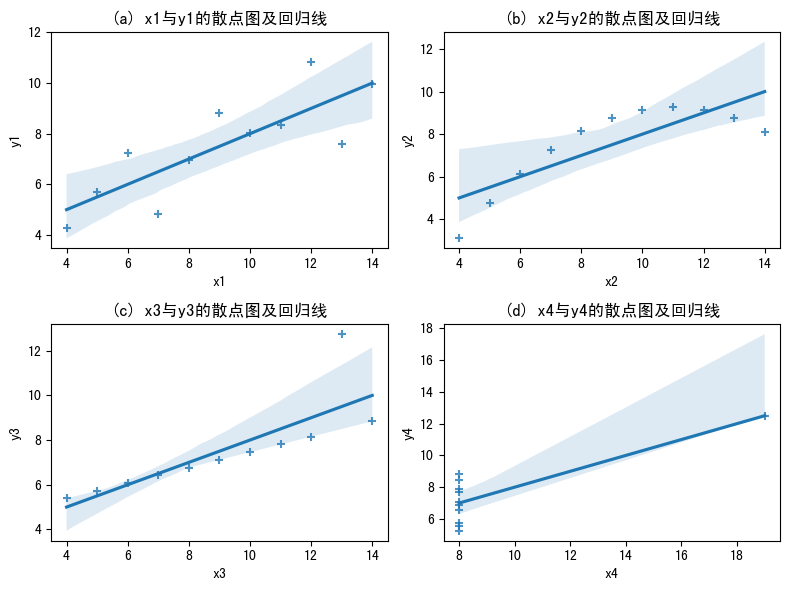

In [18]:
# 绘制散点图
plt.subplots(2, 2, figsize=(8, 6)) # 设置画布大小

plt.subplot(221) # 创建第一个子图
sns.regplot(x='x1', y='y1', data=df, marker='+') # 绘制散点图和回归线
plt.xlabel('x1') # 设置x轴标签
plt.ylabel('y1') # 设置y轴标签
plt.title('(a) x1与y1的散点图及回归线') # 设置子图标题

plt.subplot(222) # 创建第二个子图
sns.regplot(x='x2', y='y2', data=df, marker='+') # 绘制散点图和回归线
plt.xlabel('x2') # 设置x轴标签
plt.ylabel('y2') # 设置y轴标签
plt.title('(b) x2与y2的散点图及回归线') # 设置子图标题

plt.subplot(223) # 创建第三个子图
sns.regplot(x='x3', y='y3', data=df, marker='+') # 绘制散点图和回归线
plt.xlabel('x3') # 设置x轴标签
plt.ylabel('y3') # 设置y轴标签
plt.title('(c) x3与y3的散点图及回归线') # 设置子图标题

plt.subplot(224) # 创建第四个子图
sns.regplot(x='x4', y='y4', data=df, marker='+') # 绘制散点图和回归线
plt.xlabel('x4') # 设置x轴标签
plt.ylabel('y4') # 设置y轴标签
plt.title('(d) x4与y4的散点图及回归线') # 设置子图标题

plt.tight_layout() # 设置子图的间距
plt.show() # 展示图像

从上面的散点图和回归直线的拟合来看：
- 图 (a) 的的拟合效果最好，因为散点图的点比较集中在回归直线附近，且分布随机。
- 图 (b) 中散点的分布不适用于线性回归，呈现出非线性关系(如二次函数关系)。
- 图 (c) 的拟合效果一般，主要是因为存在一个离群点，对回归直线的拟合造成了影响。
- 图 (d) 中散点分布比较极端，主要集中在x4=8上，但是由于有一个点在x4=19上，导致了拟合结果不伦不类。

In [19]:
model1 = ols('y1 ~ x1', data=df).fit() # 拟合普通最小二乘回归模型
model1.summary() # 显示回归结果

/home/zmy/mambaforge/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Tue, 16 May 2023   Prob (F-statistic):            0.00217
Time:                        21:15:23   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0001      1.125      2.667      0.026       0.456       5.544
x1             0.5001      0.118      4.241      0.002       0.233       0.767
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   3.212
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.289
Skew:                          -0.122   Prob(JB):                        0.865
Kurtosis:                       2.244   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model2 = ols('y2 ~ x2', data=df).fit() # 拟合普通最小二乘回归模型
model2.summary() # 显示回归结果

/home/zmy/mambaforge/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Tue, 16 May 2023   Prob (F-statistic):            0.00218
Time:                        21:15:39   Log-Likelihood:                -16.846
No. Observations:                  11   AIC:                             37.69
Df Residuals:                       9   BIC:                             38.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0009      1.125      2.667      0.026       0.455       5.547
x2             0.5000      0.118      4.239      0.002       0.233       0.767
==============================================================================
Omnibus:                        1.594   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                1.108
Skew:                          -0.567   Prob(JB):                        0.575
Kurtosis:                       1.936   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model3 = ols('y3 ~ x3', data=df).fit() # 拟合普通最小二乘回归模型
model3.summary() # 显示回归结果

/home/zmy/mambaforge/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y3   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Tue, 16 May 2023   Prob (F-statistic):            0.00218
Time:                        21:15:56   Log-Likelihood:                -16.838
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0025      1.124      2.670      0.026       0.459       5.546
x3             0.4997      0.118      4.239      0.002       0.233       0.766
==============================================================================
Omnibus:                       19.540   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.478
Skew:                           2.041   Prob(JB):                      0.00118
Kurtosis:                       6.571   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
model4 = ols('y4 ~ x4', data=df).fit() # 拟合普通最小二乘回归模型
model4.summary() # 显示回归结果

/home/zmy/mambaforge/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y4   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     18.00
Date:                Tue, 16 May 2023   Prob (F-statistic):            0.00216
Time:                        21:16:06   Log-Likelihood:                -16.833
No. Observations:                  11   AIC:                             37.67
Df Residuals:                       9   BIC:                             38.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0017      1.124      2.671      0.026       0.459       5.544
x4             0.4999      0.118      4.243      0.002       0.233       0.766
==============================================================================
Omnibus:                        0.555   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.758   Jarque-Bera (JB):                0.524
Skew:                           0.010   Prob(JB):                        0.769
Kurtosis:                       1.931   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

对数据分别进行回归分析，可以发现：
- 四个模型都通过了显著性检验，即拟合效果都是显著的。
- 四个模型的决定系数均大于0.6，拟合优度较高。

但是，结合前文对数据可视化的结果表明：
- 尽管回归结果看起来一切合理，但是却有可能是陷阱。
- 在回归前对数据进行可视化分析是非常重要的，数无形时少直觉。
- 在回归后也要对回归模型进行诊断，以确保回归结果的可靠性。

### 9.2

In [23]:
df = pd.read_csv('./exercise/chap09/exercise9_2.csv', encoding='gbk') # 读取数据
df

,航空公司编号,航班准点率,投诉次数
0,1,81.8,21
1,2,76.6,58
2,3,76.6,85
3,4,75.7,68
4,5,73.8,74
5,6,72.2,93
6,7,71.2,72
7,8,70.8,122
8,9,91.4,18
9,10,68.5,125


In [24]:
# (1) 用航班准点率作自变量，顾客投诉次数作因变量，求出估计的回归方程，并解释回归系数的意义。
model = ols('投诉次数 ~ 航班准点率', data=df).fit() # 拟合普通最小二乘回归模型
model.summary() # 显示回归结果

/home/zmy/mambaforge/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   投诉次数   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     24.59
Date:                Tue, 16 May 2023   Prob (F-statistic):            0.00111
Time:                        21:39:46   Log-Likelihood:                -42.459
No. Observations:                  10   AIC:                             88.92
Df Residuals:                       8   BIC:                             89.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    430.1892     72.155      5.962      0.000     263.800     596.579
航班准点率         -4.7006      0.948     -4.959      0.001      -6.886      -2.515
==============================================================================
Omnibus:                        2.048   Durbin-Watson:                   1.579
Prob(Omnibus):                  0.359   Jarque-Bera (JB):                0.833
Skew:                          -0.053   Prob(JB):                        0.659
Kurtosis:                       1.590   Cond. No.                         920.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

估计的回归方程为：$\hat{y} = 430.1892 - 4.7006 \times 航班准点率$

回归系数的意义：
- 截距项：当航班准点率为0时，顾客投诉数为430.1892，在本例中没有实际意义。
- 航班准点率的回归系数：当航班准点率每增加1%，顾客投诉数减少4.7006个。

In [25]:
# (2) 检验回归系数的显著性(α=0.05)。
print('航班准点率回归系数的t检验')
print(f't值为{model.tvalues[1]:.2f}, p值为{model.pvalues[1]:.4g}')

航班准点率回归系数的t检验
t值为-4.96, p值为0.001108


由于P<0.05, 所以航班准点率回归系数显著不为0。

In [29]:
# (3) 如果航班准点率为80%，估计顾客的投诉次数。
y_hat = model.params[0] + model.params[1] * 80 # 计算预测值
print(f'当航班准点率为80%时, 预计顾客的投诉次数为{y_hat:.2f}')

当航班准点率为80%时, 预计顾客的投诉次数为54.14


### 9.3

In [30]:
df = pd.read_csv('./exercise/chap09/exercise9_3.csv', encoding='gbk') # 读取数据
df

,超市,广告费支出/万元,销售额/万元
0,A,1,19
1,B,2,32
2,C,4,44
3,D,6,40
4,E,10,52
5,F,14,53
6,G,20,54


In [32]:
df.columns = ['超市', '广告费支出', '销售额'] # 重命名列名
model = ols('销售额 ~ 广告费支出', data=df).fit() # 拟合普通最小二乘回归模型
model.summary() # 显示回归结果

/home/zmy/mambaforge/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    销售额   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     11.15
Date:                Tue, 16 May 2023   Prob (F-statistic):             0.0206
Time:                        21:52:31   Log-Likelihood:                -23.203
No. Observations:                   7   AIC:                             50.41
Df Residuals:                       5   BIC:                             50.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.3991      4.807      6.116      0.002      17.042      41.757
广告费支出          1.5475      0.463      3.339      0.021       0.356       2.739
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.257
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.480
Skew:                          -0.481   Prob(JB):                        0.787
Kurtosis:                       2.152   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

估计的回归方程为: $\hat {y}=29.3991+1.5475 \times$ 广告费支出

回归系数的意义：
- 截距项：当广告费支出为0时，销售额为29.3991万元。
- 广告费支出的回归系数：当广告费支出每增加1万元，销售额增加1.5475万元。

回归模型总体显著(F检验)，各回归系数均显著(t检验)，拟合优度较高(决定系数大于0.6)。

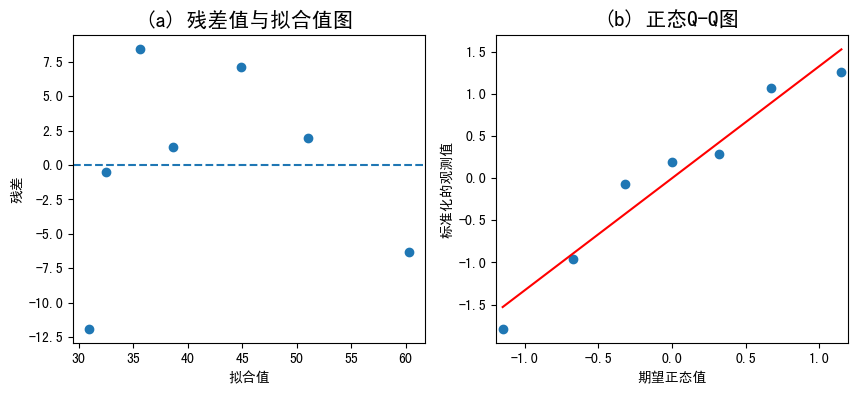

In [33]:
# 残差的正态性与方差齐性
plt.subplots(1, 2, figsize=(10, 4)) # 设置画布大小

plt.subplot(121) # 创建第一个子图
plt.scatter(model.fittedvalues, model.resid) # 绘制散点图
plt.axhline(0, linestyle='--') # 绘制e=0的直线
plt.xlabel('拟合值') # 设置x轴标签
plt.ylabel('残差') # 设置y轴标签
plt.title('(a) 残差值与拟合值图', fontsize=15) # 设置子图标题

ax2 = plt.subplot(122) # 创建第二个子图
pplot = sm.ProbPlot(model.resid, fit=True) # 创建概率图对象
pplot.qqplot(line='r', ax=ax2, xlabel='期望正态值', ylabel='标准化的观测值') # 绘制Q-Q图
ax2.set_title('(b) 正态Q-Q图', fontsize=15) # 设置子图标题

plt.show()

模型拟合残差呈现以0轴为中心的随机分布，没有明显的异方差现象，基本符合正态性和方差齐性的假定。